In [2]:
import numpy as np
from importlib import reload
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

Created TAP+ (v1.0) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
#starting with north galactic pole using tgas_source for parallax measurements
job = Gaia.launch_job_async("SELECT * \
FROM gaiadr1.tgas_source \
WHERE CONTAINS(POINT('ICRS', ra, dec), CIRCLE('ICRS', 192.858333, 27.12834, 4))=1;" \
                           , dump_to_file=True)
print(job)

Launched query: 'SELECT * FROM gaiadr1.tgas_source WHERE CONTAINS(POINT('ICRS', ra, dec), CIRCLE('ICRS', 192.858333, 27.12834, 4))=1;'
Retrieving async. results...
Jobid: 1517800748611O
Phase: None
Owner: None
Output file: async_20180204191908.vot
Results: None


In [5]:
table = job.get_results()
#print(table['parallax'])

In [15]:
plx = table['parallax']
plx = plx / 1000 #to arcseconds from mas
plx = 1/plx
dist_mask = np.where(plx <= 300)
lim_table = table[dist_mask]

In [16]:
print(lim_table)

 hip   tycho2_id      solution_id     ...      ecl_lon            ecl_lat      
                                      ...        deg                deg        
----- ----------- ------------------- ... ------------------ ------------------
   --  2532-254-1 1635378410781933568 ... 180.89123247218856  33.48230513954752
   --  1995-228-1 1635378410781933568 ...  180.2423092196195  32.68714400078409
   -- 1995-1639-1 1635378410781933568 ...  182.7068530890685  32.02256751122316
   -- 1995-1839-1 1635378410781933568 ...  181.4521692145934  31.33440546075399
   -- 1995-1296-1 1635378410781933568 ...  182.0924753236881  31.08293074099909
   --   1996-30-1 1635378410781933568 ... 183.43095935687472  32.38046883895929
   -- 1995-1447-1 1635378410781933568 ...  182.3089482485203 30.122755622921144
   --  1995-887-1 1635378410781933568 ... 182.23932268552363  30.36538184831903
   -- 1995-1153-1 1635378410781933568 ... 182.74201244081092  30.46770628148022
   --  1995-392-1 1635378410781933568 ..

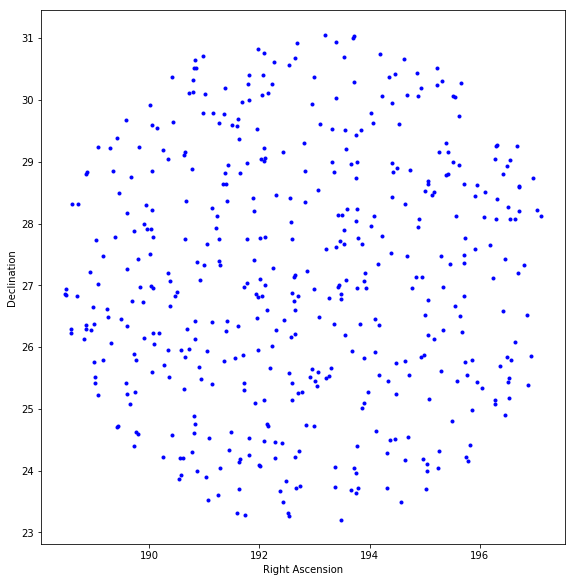

In [19]:
x = lim_table['ra']
y = lim_table['dec']
    
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(8,8)
 
fig.tight_layout()

ax.set_ylabel("Declination")
ax.set_xlabel("Right Ascension")
    
ax.plot(x, y, color='b', marker='o', markersize=3, linestyle='None');